# Logistic Regression Model #

This is mostly for fun and to see how good of a model I can get

William Armentrout

---
### Import Statements and Load Data ###

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Stress_Dataset.csv')
#data.head()

---
### 1) Target: clean labels to short forms, then encode ###

In [2]:
type_col = 'Which type of stress do you primarily experience?'
data[type_col] = data[type_col].str.split('-').str[0].str.strip()

le = LabelEncoder()
y = le.fit_transform(data[type_col])

---
### 2) Features: all numeric columns except target

In [3]:
X = data.drop(columns=[type_col]).select_dtypes(include='number')

---
### 3) Train/test split (stratify to preserve class proportions)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

---
### 4) Baseline (sanity check)

In [5]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
baseline_acc = dummy.score(X_test, y_test)
print(f'Baseline (most frequent) accuracy: {baseline_acc:.4f}')

Baseline (most frequent) accuracy: 0.9112


---
### 5) Multinomial logistic regression pipline

In [9]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=2000,
    ))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Logistic accuracy: {acc:.4f}\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Logistic accuracy: 0.9822

                            precision    recall  f1-score   support

Distress (Negative Stress)       1.00      0.83      0.91         6
Eustress (Positive Stress)       0.98      1.00      0.99       154
                 No Stress       1.00      0.78      0.88         9

                  accuracy                           0.98       169
                 macro avg       0.99      0.87      0.92       169
              weighted avg       0.98      0.98      0.98       169



C:\Users\William\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


---
### 6) Confusion Matrix

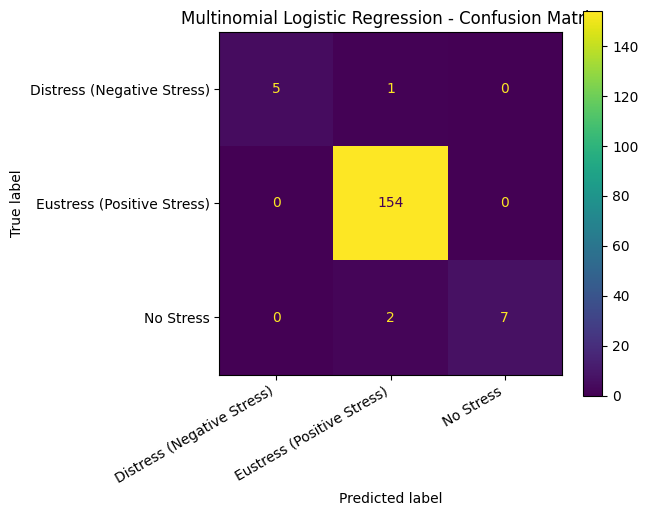

In [15]:
cm = confusion_matrix(y_test, y_pred, labels=range(len(le.classes_)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(values_format='d')
plt.title('Multinomial Logistic Regression - Confusion Matrix')
plt.tight_layout()
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.show()

---
### 7) Inspect feature effects (coefficients & odds ratios)

In [17]:
clf = pipe.named_steps['clf']
coef = clf.coef_
odds = np.exp(coef)
feature_names = X.columns

for i, cls in enumerate(le.classes_):
    top_idx = np.argsort(np.abs(coef[i]))[::-1][:8]
    print(f"\nTop feature for class = {cls}")
    for j in top_idx:
        print(f"  {feature_names[j]:55s} coef={coef[i,j]:.3f} OR={odds[i,j]:.2f}")


Top feature for class = Distress (Negative Stress)
  Do you get irritated easily?                            coef=1.388 OR=4.01
  Have you noticed a rapid heartbeat or palpitations?     coef=1.071 OR=2.92
  Have you been dealing with anxiety or tension recently?.1 coef=0.968 OR=2.63
  Is your hostel or home environment causing you difficulties? coef=0.906 OR=2.47
  Have you gained/lost weight?                            coef=0.882 OR=2.42
  Is your working environment unpleasant or stressful?    coef=0.870 OR=2.39
  Are you facing any difficulties with your professors or instructors? coef=0.823 OR=2.28
  Do you have trouble concentrating on your academic tasks? coef=0.789 OR=2.20

Top feature for class = Eustress (Positive Stress)
  Are you facing any difficulties with your professors or instructors? coef=0.326 OR=1.39
  Have you recently experienced stress in your life?      coef=0.301 OR=1.35
  Do you lack confidence in your academic performance?    coef=0.218 OR=1.24
  Have you bee